In [151]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle
from astropy.time import Time

import matplotlib.pyplot as plt

In [152]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [103]:
# https://archive.eso.org/dss/dss
filename = 'dss2.19.26.56.50-27.03.00.0.fits'

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '1991/08/06        ' to '1991-08-06T00:00:00.0''. [astropy.wcs.wcs]


(-27.55, -26.55)

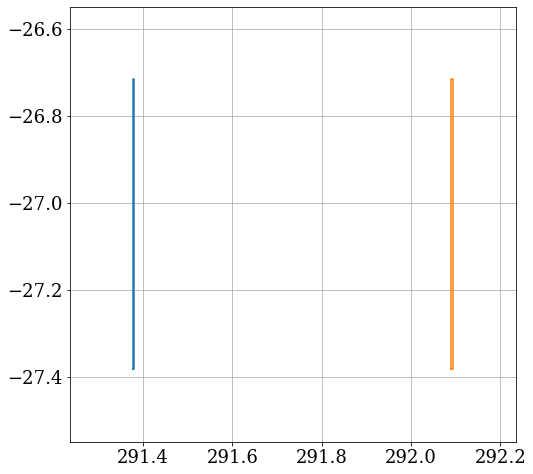

In [102]:
ra0 = (19 + 25/60 + 31/3600)*15
ra1 = (19 + 28/60 + 22/3600)*15
de0 = -27 - (3/60)
ram = (ra0+ra1)/2

dra = 5./3600
dde = 20./60

plt.figure(figsize=(8,8))
plt.plot([ra0-dra, ra0+dra, ra0+dra, ra0-dra, ra0-dra], [de0-dde, de0-dde, de0+dde, de0+dde, de0-dde])
plt.plot([ra1-dra, ra1+dra, ra1+dra, ra1-dra, ra1-dra], [de0-dde, de0-dde, de0+dde, de0+dde, de0-dde])
plt.grid(True)
dx = 0.5
plt.xlim(ram-dx,ram+dx)
plt.ylim(de0-dx,de0+dx)

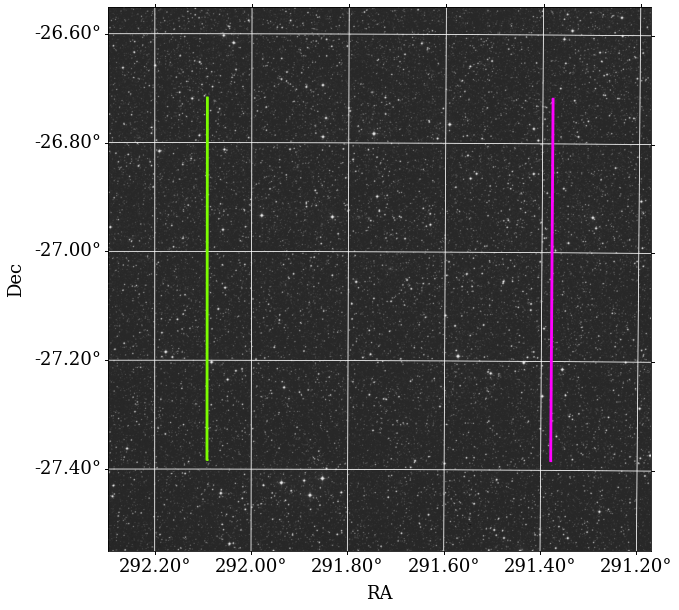

In [126]:
plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.gray)
ax.grid(color='white', ls='solid')

ra = ax.coords['ra']
de = ax.coords['dec']

ra.set_major_formatter('d.dd')
de.set_major_formatter('d.dd')
ra.set_axislabel('RA')
de.set_axislabel('Dec')

# 19:25:31 -27:03:00
# 19:28:22 -27:03:00

# RA err = 5sec
# Dec err = 20min

# r1 = Quadrangle(((19 + 25/60 + 31/3600)*15, -27 - (3/60) - 10/60)*u.deg, (5/3600)*u.deg, (20/60)*u.deg,
#                edgecolor='green', facecolor='none',
#                transform=ax.get_transform('fk5'))

# r2 = Quadrangle(((19 + 28/60 + 22/3600)*15, -27 - (3/60) - 10/60)*u.deg, (5/3600)*u.deg, (20/60)*u.deg,
#                edgecolor='green', facecolor='none',
#                transform=ax.get_transform('fk5'))

# ax.add_patch(r1)
# ax.add_patch(r2)

ax.plot([ra0-dra, ra0+dra, ra0+dra, ra0-dra, ra0-dra], 
        [de0-dde, de0-dde, de0+dde, de0+dde, de0-dde], transform=ax.get_transform('icrs'), c='magenta')
ax.plot([ra1-dra, ra1+dra, ra1+dra, ra1-dra, ra1-dra], 
        [de0-dde, de0-dde, de0+dde, de0+dde, de0-dde], transform=ax.get_transform('icrs'), c='LawnGreen')

In [128]:
print(ra0-dra, ra0+dra)
print(ra1-dra, ra1+dra)
print(de0-dde, de0+dde)

291.37777777777785 291.3805555555556
292.09027777777777 292.0930555555555
-27.383333333333333 -26.71666666666667


In [214]:
df1 = pd.read_csv('1652909770607O-result.csv')
df2 = pd.read_csv('1652909749667O-result.csv')

# df3 = pd.read_csv('1652937137443O-result.csv')

iso = pd.read_table('MIST_iso_62857afa12d42.iso.cmd',delim_whitespace=True, skiprows=12)

In [163]:
# WOW! signal date
t0 = Time({'year': 1977, 'month': 8, 'day': 15}, format='ymdhms')

t1 = Time({'year':2016}, format='ymdhms')
(t1-t0).to('year')

<Quantity 38.37919297 yr>

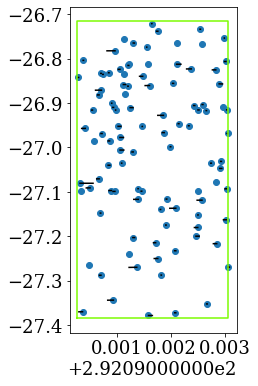

In [204]:
# do we need to worry about stars moving in/out of this slim FOV? Nope!
pmra1 = ((df1['pmra'].values*u.mas/u.year) * (t1-t0).to('year')).to('deg').value
pmde1 = ((df1['pmdec'].values*u.mas/u.year) * (t1-t0).to('year')).to('deg').value

plt.figure(figsize=(3,6))
plt.scatter(df1['ra'], df1['dec'])

for k in range(len(df1)):
    if np.isfinite(pmra1[k]):
        plt.plot([df1['ra'].values[k], df1['ra'].values[k]+pmra1[k]], 
                 [df1['dec'].values[k], df1['dec'].values[k]+pmde1[k]], c='k')

plt.plot([ra1-dra, ra1+dra, ra1+dra, ra1-dra, ra1-dra], 
        [de0-dde, de0-dde, de0+dde, de0+dde, de0-dde], c='LawnGreen')

/Users/james/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


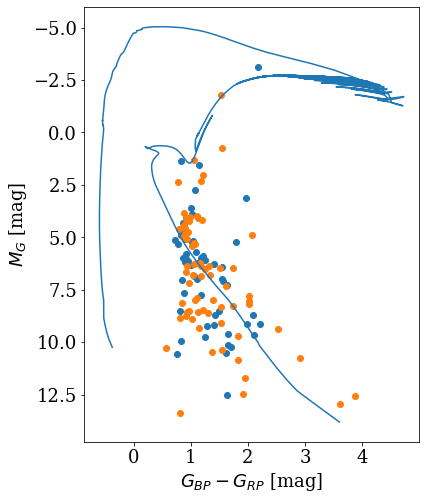

In [220]:
plt.figure(figsize=(6,8))
plt.scatter(df1['bp_rp'], df1['phot_g_mean_mag'] - 5*np.log10(1000/df1['parallax']) + 5)
plt.scatter(df2['bp_rp'], df2['phot_g_mean_mag'] - 5*np.log10(1000/df2['parallax']) + 5)

plt.gca().invert_yaxis()
plt.xlabel('$G_{BP}-G_{RP}$ [mag]')
plt.ylabel('$M_G$ [mag]')

plt.plot(iso['Gaia_BP_EDR3']-iso['Gaia_RP_EDR3'], iso['Gaia_G_EDR3'])